## OB1 performance on the flanker task and the sentence task

In [1]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns

### Analysis OB1 activation on Flanker Experiment

In [11]:
df = pd.read_pickle("/Users/pleunvaartjes/Documents/python/VU_werk/OB1_general_map/OB1_SAM/Results/alldata_EmbeddedWords.pkl")
df = pd.DataFrame(df) #NV: had to add this. Pandas probably changed syntax in an update, causing an error without this line
df.head(-30)

,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,...,word threshold,word frequency,word predictability,reaction time,correct,position,inhibition_value,wordlen_threshold,error_rate,item_nr
0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,1
1,tight,tighten,tight,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,2
2,box,boxer,box,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[375],[1],[],-0.0015,0.15,0.0,3
3,own,owner,own,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[375],[1],[],-0.0015,0.15,0.0,4
4,farm,farmer,farm,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,add,address,add,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[350],[1],[],-0.0015,0.15,0.0,98
98,tea,tease,tea,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[375],[1],[],-0.0015,0.15,0.0,99
99,pill,pillow,pill,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[350],[1],[],-0.0015,0.15,0.0,100
100,drag,dragon,drag,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,101


In [12]:
behav2plot = df.copy(deep=True)
behav2plot['condition'] = behav2plot['condition'].str[5:] #NV: remove "word/"

behav2plot['RT'] = behav2plot['reaction time'].str[0]
behav2plot['correct'] = behav2plot['correct'].str[0]

conditiondict = {"no": "no-flank", "related":"repetition"}
behav2plot["condition"].replace(conditiondict, inplace=True)
behav2plot.head(-30)


,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,...,word frequency,word predictability,reaction time,correct,position,inhibition_value,wordlen_threshold,error_rate,item_nr,RT
0,weak,weaken,weak,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,1,375
1,tight,tighten,tight,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,2,375
2,box,boxer,box,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[375],1,[],-0.0015,0.15,0.0,3,375
3,own,owner,own,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[375],1,[],-0.0015,0.15,0.0,4,375
4,farm,farmer,farm,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,5,375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,add,address,add,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[350],1,[],-0.0015,0.15,0.0,98,350
98,tea,tease,tea,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[375],1,[],-0.0015,0.15,0.0,99,375
99,pill,pillow,pill,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[350],1,[],-0.0015,0.15,0.0,100,350
100,drag,dragon,drag,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,101,375


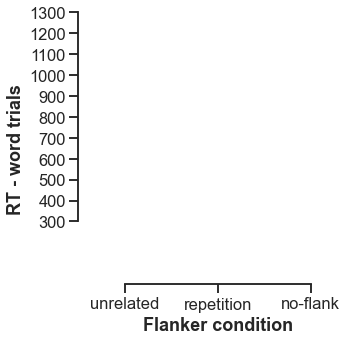

In [13]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="RT",
              data=behav2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="RT", 
              data=behav2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)

ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("RT - word trials",fontdict=dict(weight='bold'))
ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


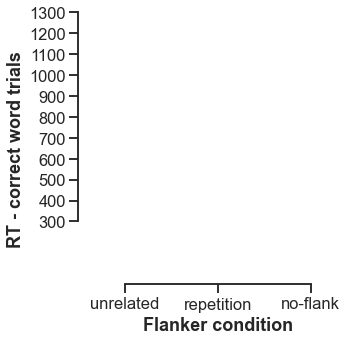

In [14]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))
cor2plot = behav2plot.copy(deep=True)
cor2plot = cor2plot[cor2plot['correct']==1]

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="RT",
              data=cor2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="RT", 
              data=cor2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)

ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("RT - correct word trials",fontdict=dict(weight='bold'))
ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


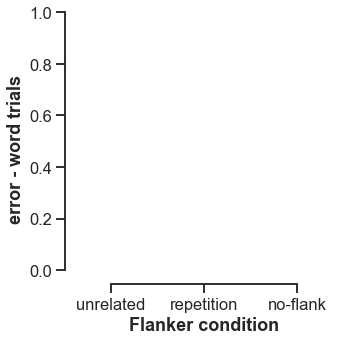

In [15]:
error = {1:0, 0:1}
behav2plot['error'] = behav2plot["correct"].replace(error, inplace=False)

# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="error",
              data=behav2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="error", 
              data=behav2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)
ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("error - word trials",fontdict=dict(weight='bold'))
ax.set_yticks([0, 0.2, 0.4,0.6, 0.8, 1.0])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


### Plot target and lexicon activations in the model 

In [16]:
target2plot = df.copy(deep=True)
#data2plot = data2plot[data2plot['condition'].str.startswith(('word'))]

target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25


target2plot["target activity per cycle"] = pd.to_numeric(target2plot["target activity per cycle"].str[0], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=target2plot, x="time", y="target activity per cycle", hue = "condition",color ='black' , ci='sd',  linewidth=3, palette=["yellow", "blue", "coral"], legend=False)

ax.set_title("Target activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("target activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



ValueError: Length of values (23040) does not match length of index (3611)

### Lexicon activations 

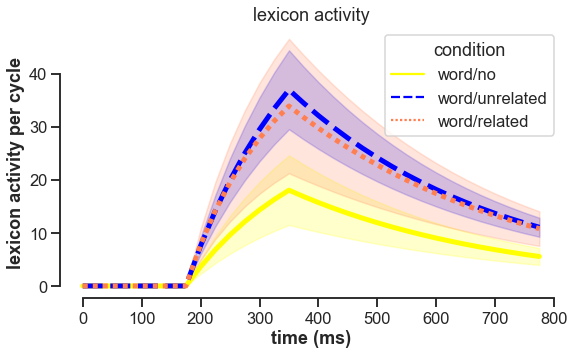

In [8]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle",hue = "condition", style= "condition",color ='black' , ci='sd',  linewidth=5,palette=["yellow", "blue", "coral"], legend=True)

ax.set_title("lexicon activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



In [9]:
lexicon2plot.head(2)
lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

,trial,stimulus,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,cycle nr,time,bin
16,0,lent,lent,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16.046356,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.13337968354209412, 0.13337968354209412, 0.1...","[1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, ...",2,2,0.765156,0.961421,0,[625],[1],[],16,400,3
48,1,ment drap ment,drap,word/unrelated,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",23.238400,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05584062249291546, 0.05584062249291546, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 12, 12, 12, 12, 12, 1...",7,7,0.779450,0.567026,0,[625],[1],[],16,400,5
80,2,dire dire dire,dire,word/related,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",43.298923,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05584062249291546, 0.05584062249291546, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, ...",7,7,0.683716,3.208565,0,[500],[1],[],16,400,10


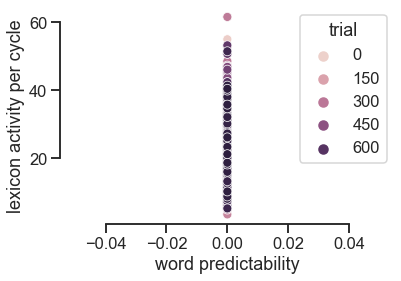

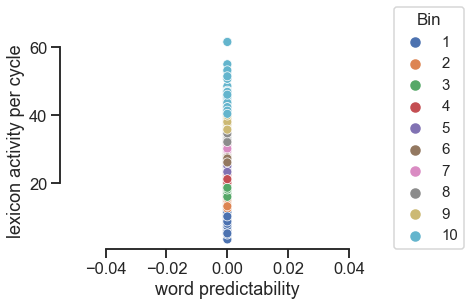

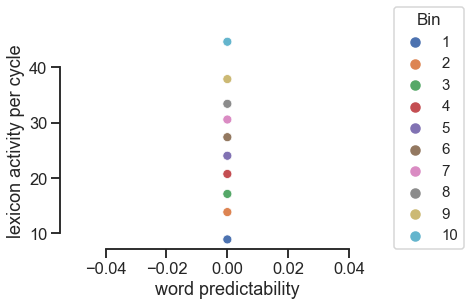

In [10]:

sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['lexicon activity per cycle'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1_analysis/Noor_versie/2020_reading_EEG/Data/OB1_dataFlankerlexicon.pkl')
lexicon_peak.head(3)

### bigram activations 

In [17]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "trial", style='condition',color ='black' , ci='sd',  linewidth=3,
             #palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



ValueError: Length of values (23040) does not match length of index (3611)

In [18]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('ngrams')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["ngrams"] = pd.to_numeric(lexicon2plot["ngrams"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="ngrams", hue = "condition", style="condition",color ='black' , ci='sd',  linewidth=3,
             palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigrams")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigrams",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




ValueError: Length of values (23040) does not match length of index (3611)

### OB1 performance on the sentence reading task (experiment 2)

In [19]:
df = pd.read_pickle("/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1/Results/alldata_Sentence.pkl")
df=pd.DataFrame(df) #NV: had to add this, as above
df.head(3)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1/Results/alldata_Sentence.pkl'

In [14]:
data2plot = df.copy(deep=True)
data2plot['RT'] = df['reaction time'].str[0]
data2plot['correct'] = df['correct'].str[0]
data2plot['position'] = df['position'].astype(str)

In [15]:
data2plot.head(300)

,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,RT
0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",9,9,0.655094,3.998309,0,[1075],0,1,1,1075
1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",9,9,0.800000,0.000000,0,[1075],0,1,2,1075
2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.536...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",8,8,0.737891,1.713742,0,[1075],0,1,3,1075
3,votre reine était bonne,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.22...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04146667583159084, 0.04146667583159084, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",11,11,0.800000,0.000000,0,[1075],0,1,4,1075
4,votre roi était grand,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.697...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",10,10,0.800000,0.000000,0,[1075],0,1,5,1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,danse amie bien son,[],amie,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.18...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 23, 23, 23, 23, 23, 2...",9,9,0.724564,2.081455,0,[575],1,2,296,575
296,bien aimes vivre tu,[],aimes,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.55...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 23, 23, 23, 23, 23, 2...",9,9,0.719129,2.231419,0,[575],1,2,297,575
297,dit vous ils ont,[],vous,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.044...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 1...",8,8,0.650205,4.133210,0,[575],1,2,298,575
298,bons è amis nous,[],è,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.052...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 16, 16, 16, 16, 16, 1...",8,8,0.800000,0.000000,0,[1075],0,2,299,1075


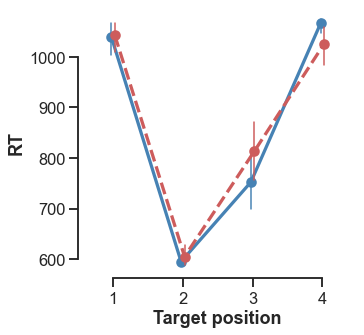

In [16]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
# sns.stripplot(x="position", y="RT", hue="condition",
#               data=data2plot, dodge=False, jitter=True, 
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="RT", hue="condition", linestyles=['-', '--'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5, palette = ['steelblue', 'indianred'],
                scale=0.8,order=["1", "2","3","4"],bw=.2)

#sns.lineplot(x="position", y="RT",
 #             data=data2plot)

ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("RT",fontdict=dict(weight='bold'))
# ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])
ax.legend_.remove()

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)





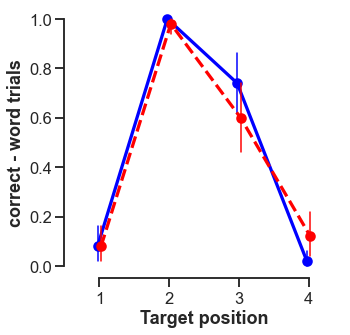

In [17]:
error = {1:0, 0:1}
data2plot['error'] = data2plot["correct"].replace(error, inplace=False)

# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
# sns.stripplot(x="position", y="error",  hue="condition",
#               data=data2plot, dodge=False, jitter=True,
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="correct", hue="condition", linestyles=['-', '--'],palette=['blue', 'red'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5,
                scale=0.8,order=["1", "2","3","4"],bw=.2)

# ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("correct - word trials",fontdict=dict(weight='bold'))
ax.legend_.remove()

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


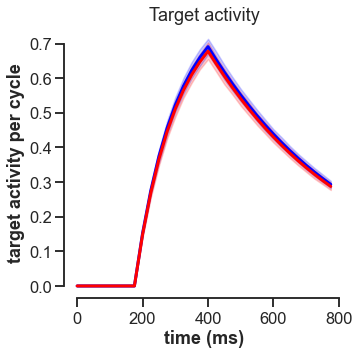

In [18]:
target2plot = df.copy(deep=True)

target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25


target2plot["target activity per cycle"] = pd.to_numeric(target2plot["target activity per cycle"].str[0], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=target2plot, x="time", y="target activity per cycle", hue = "condition",color ='black' , ci=95,  linewidth=3, palette = ['blue', 'red'], legend=False)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("target activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Target activity")

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


### Then for lexicon

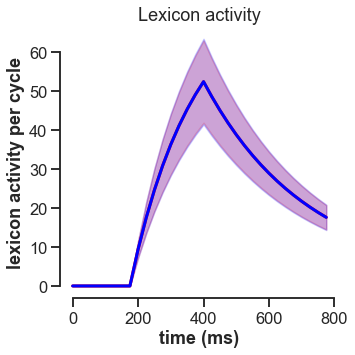

In [19]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", palette = ['red','blue'], legend=False,color ='black' , ci='sd',  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


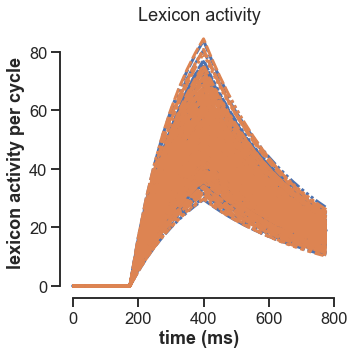

In [20]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", style="trial", legend=False,color ='black' , ci=95,  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


In [21]:
lexicon2plot.head(2)

lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

In [22]:
lexicon_peak.head(30)


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",55.946941,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",...,9,0.655094,3.998309,0,[1075],[0],1,1,16,400
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",52.413509,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",...,9,0.800000,0.000000,0,[1075],[0],1,2,16,400
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",38.084389,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",...,8,0.737891,1.713742,0,[1075],[0],1,3,16,400
112,3,votre reine était bonne,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",75.468285,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04146667583159084, 0.04146667583159084, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",...,11,0.800000,0.000000,0,[1075],[0],1,4,16,400
144,4,votre roi était grand,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",54.791161,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",...,10,0.800000,0.000000,0,[1075],[0],1,5,16,400
176,5,ton homme sera jeune,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",50.250805,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 25, 25, 25, 25, 25, 2...",...,10,0.737891,1.713742,0,[1075],[0],1,6,16,400
208,6,ton cou est gros,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",37.917858,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 1...",...,8,0.737891,1.713742,0,[1075],[0],1,7,16,400
240,7,elles sont avec lui,[],elles,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",59.198139,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 21, 21, 21, 21, 21, 2...",...,9,0.704909,2.623776,0,[1075],[0],1,8,16,400
272,8,cet ours mange tout,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",55.319195,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",...,9,0.702187,2.698892,0,[1075],[0],1,9,16,400
304,9,cet ours vit ici,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",45.861042,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 1...",...,8,0.702187,2.698892,0,[1075],[0],1,10,16,400


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time,bin
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",55.946941,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",...,0.655094,3.998309,0,[1075],[0],1,1,16,400,7
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",52.413509,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",...,0.800000,0.000000,0,[1075],[0],1,2,16,400,6
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",38.084389,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",...,0.737891,1.713742,0,[1075],[0],1,3,16,400,1


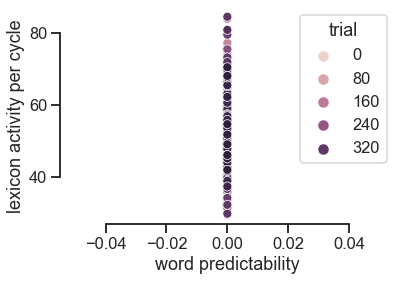

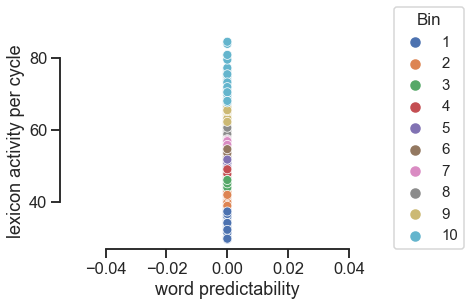

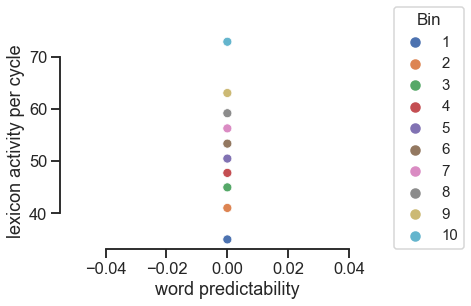

In [23]:
#lexicon_peak
sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['lexicon activity per cycle'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1_analysis/Noor_versie/2020_reading_EEG/Data/Sentencelexicon.pkl')
lexicon_peak.head(3)

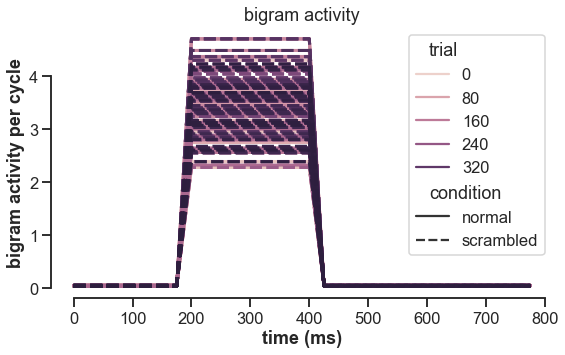

In [24]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "trial", style='condition',color ='black' , ci='sd',  linewidth=3,
             #palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



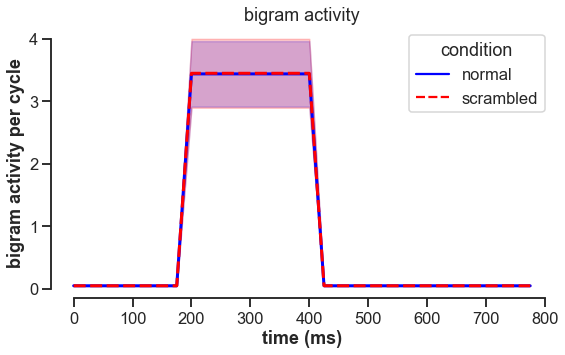

In [25]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "condition", style='condition',color ='black' , ci='sd',  linewidth=3,
             palette=["blue", "red"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



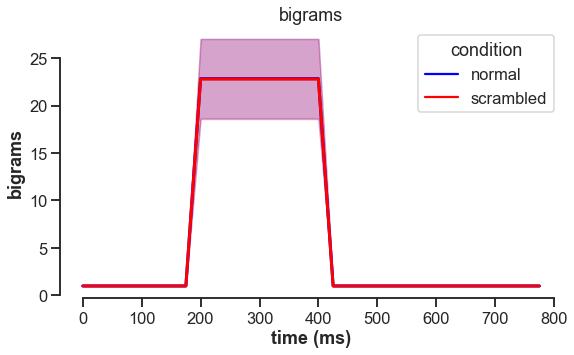

In [26]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('ngrams')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["ngrams"] = pd.to_numeric(lexicon2plot["ngrams"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="ngrams", hue = "condition",color ='black' , ci='sd',  linewidth=3,
             palette=["blue", "red"], legend=True
            )

ax.set_title("bigrams")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigrams",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




In [27]:
lexicon2plot.head(2)

lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

In [28]:
lexicon_peak.head(30)


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",19.0,...,9,0.655094,3.998309,0,[1075],[0],1,1,16,400
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",24.0,...,9,0.800000,0.000000,0,[1075],[0],1,2,16,400
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.536...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",14.0,...,8,0.737891,1.713742,0,[1075],[0],1,3,16,400
112,3,votre reine était bonne,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.22...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04146667583159084, 0.04146667583159084, 0.0...",32.0,...,11,0.800000,0.000000,0,[1075],[0],1,4,16,400
144,4,votre roi était grand,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.697...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...",32.0,...,10,0.800000,0.000000,0,[1075],[0],1,5,16,400
176,5,ton homme sera jeune,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.964...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...",25.0,...,10,0.737891,1.713742,0,[1075],[0],1,6,16,400
208,6,ton cou est gros,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.453...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",15.0,...,8,0.737891,1.713742,0,[1075],[0],1,7,16,400
240,7,elles sont avec lui,[],elles,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.63...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",21.0,...,9,0.704909,2.623776,0,[1075],[0],1,8,16,400
272,8,cet ours mange tout,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.713...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",24.0,...,9,0.702187,2.698892,0,[1075],[0],1,9,16,400
304,9,cet ours vit ici,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.947...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",15.0,...,8,0.702187,2.698892,0,[1075],[0],1,10,16,400


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time,bin
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",19.0,...,0.655094,3.998309,0,[1075],[0],1,1,16,400,2
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",24.0,...,0.800000,0.000000,0,[1075],[0],1,2,16,400,6
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.536...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",14.0,...,0.737891,1.713742,0,[1075],[0],1,3,16,400,1


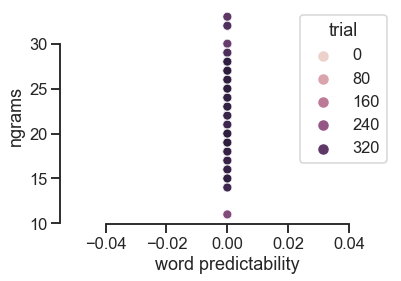

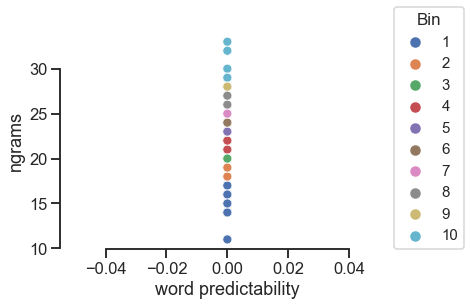

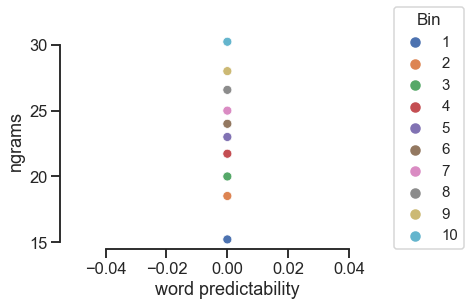

In [29]:
#lexicon_peak
sns.scatterplot(data=lexicon_peak,  x="word predictability", y="ngrams", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['ngrams'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="ngrams", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="ngrams", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1_analysis/Noor_versie/2020_reading_EEG/Data/Sentencelexicon_ngrams.pkl')
lexicon_peak.head(3)

In [30]:
lexicon2plot = df.copy(deep=True)
lexicon2plot['stripped']= lexicon2plot['stimulus'].str.replace(" ","")
lexicon2plot['nletters']= lexicon2plot['stripped'].str.len()

#(lexicon2plot['stimulus'].str.strip()).len(
lexicon2plot.head(2)


,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,stripped,nletters
0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",9,9,0.655094,3.998309,0,[1075],[0],1,1,lesverssontloin,15
1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",9,9,0.800000,0.000000,0,[1075],[0],1,2,cesloupsvontvoir,16


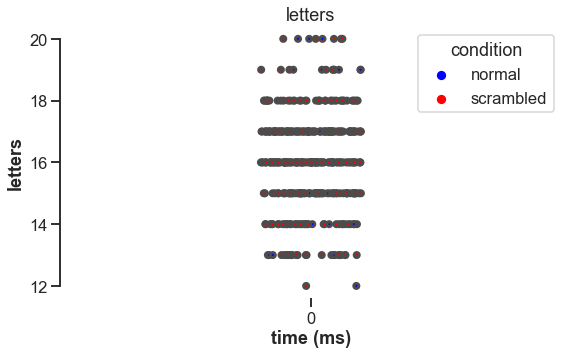

In [31]:


lexicon2plot["nletters"] = pd.to_numeric(lexicon2plot["nletters"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.stripplot(data=lexicon2plot, x="word predictability", y="nletters", hue = "condition",  linewidth=3,
             palette=["blue", "red"], dodge=False, jitter=True,
            )

ax.set_title("letters")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("letters",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




In [32]:
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})


In [33]:
lexicon2plot.head(20)

lexicon_peak = lexicon2plot.copy(deep=True)

In [131]:
lexicon_peak.head(30)
lexicon_peak.to_pickle('/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1_analysis/Noor_versie/2020_reading_EEG/Data/Sentencelexicon_nletters.pkl')


NameError: name 'lexicon_peak' is not defined

In [132]:
### Analysis of Embedded Words task

In [2]:
df= pd.read_pickle(r"/Volumes/GoogleDrive/My Drive/python/VU_werk/OB1_general_map/OB1_Nathan/Results/alldata_EmbeddedWords.pkl")
df=pd.DataFrame(df)


In [3]:
df2plot=df.copy(deep=True)
df2plot['suffixed']=df['condition'].str.split('/').str[0] #NV: Add new column with suffix / non suffix and extract info from condition
df2plot['condition']=df['condition'].str.split('/').str[1]#NV: and replace condition with only the actual condition

df2plot['RT']=df2plot['reaction time'].str[0]


In [4]:
df2plot.tail(3)

#df2plot.at[1, 'target activity per cycle']

,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,suffixed,RT
129,ski,dusty,ski,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[0.0, 0.0, 0.0, 0.0, 0.0, 5.3911842048887095, ...","[0, 0, 0, 0, 0, 0.26258234790065393, 0.4350113...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...","[3, 3, 3, 3, 3, 11, 11, 5, 5, 5, 5, 5, 5, 5]",...,[1],[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.013444...",0.0,130,non suffixed,500
130,won,gloomy,won,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.331489977232776, 7...","[0, 0, 0, 0, 0, 0.31590714388892993, 0.5149168...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...","[3, 3, 3, 3, 3, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5...",...,[1],[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.022623...",0.0,131,non suffixed,600
131,cart,girdle,cart,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...","[3, 3, 3, 3, 3, 14, 14, 8, 8, 8, 8, 8, 8, 8, 8...",...,[1],[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.015830...",0.0,132,non suffixed,550


Text(0.03, 0.8, ' error rate:0.0\n inhibition value:-1.2\n wordlen similarity threshold:0.15')

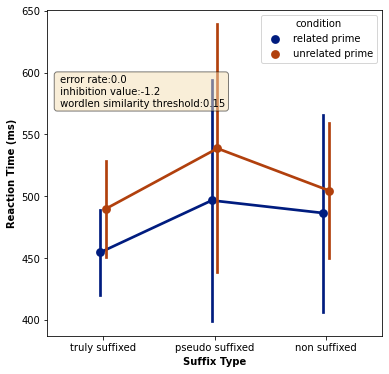

In [5]:

f, ax = plt.subplots(figsize=(6,6))

#Nv: plot reaction times per condition and per suffix

sns.pointplot(x='suffixed', y='RT', hue='condition', palette="dark", ci='sd', dodge=True, font_scale=0.8, data=df2plot) #NV: plot all suffix conditions separated by prime type and standard deviation of the mean
#sns.stripplot(x="suffixed", y="RT", hue='condition', data=df2plot, dodge=False, palette="dark", alpha=.8) #NV: is not so informative, actually.

ax.set_xlabel("Suffix Type",fontdict=dict(weight='bold'))
ax.set_ylabel("Reaction Time (ms)",fontdict=dict(weight='bold'))

text=' error rate:'+str(df2plot['error_rate'].iloc[-1])+'\n inhibition value:'+str(df2plot['inhibition_value'][1])+'\n wordlen similarity threshold:'+str(df2plot['wordlen_threshold'][1])
ax.text(0.03, 0.8, text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5))


In [248]:
#NV: plot difference in correct vs false answers.

i=df[df['correct'].str[0]==0]
print(len(i))
print(i)



0
Empty DataFrame
Columns: [stimulus, prime, target, condition, cycle, lexicon activity per cycle, stimulus activity per cycle, target activity per cycle, bigram activity per cycle, ngrams, exact recognized words positions, exact recognized words, eye position, attention position, word threshold, word frequency, word predictability, reaction time, correct, POS, position, inhibition_value, wordlen_threshold, target_inhib, error_rate, item_nr]
Index: []

[0 rows x 26 columns]


In [249]:
#NV: plot target activity per cycle. Note : This is much harder here because of variable cycle lenght! ( trial ends on word recog)

target2plot = df.copy(deep=True)

In [250]:
#first figure out max amount of cycles per trial:
max_cycles=0
for i in range(len(target2plot)):
    max_cycles=max(max_cycles, len(target2plot.iloc[i]['target activity per cycle']))
print(max_cycles)
#then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target2plot)):
    target2plot.at[i,'target activity per cycle']=np.pad(np.hstack(target2plot.iloc[i]['target activity per cycle']), (0,max_cycles-len(target2plot.iloc[i]['target activity per cycle'])), mode='constant')

    
target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

#len(target2plot.tail(1)['cycle'])


26


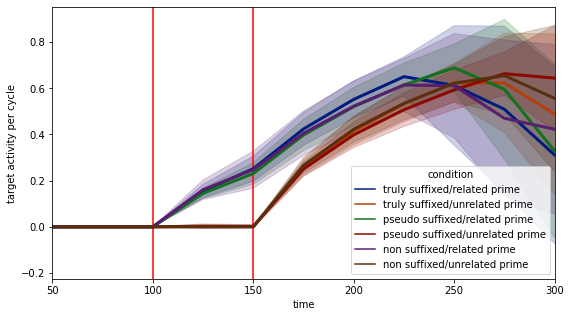

In [251]:

# initializing list of lists 
test_list = list(range(max_cycles))
# declaring magnitude of repetition 
K = len(df)

m = K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25

f, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=50, right=300)


ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

sns.lineplot(ax=ax, data=target2plot, x="time", y="target activity per cycle", hue = "condition",palette='dark' , ci='sd',  linewidth=3)


plt.show()


#### target inhibition per cycle, between conditions


In [252]:
target2plot = df.copy(deep=True)

In [253]:
#first figure out max amount of cycles per trial:
max_cycles=0
for i in range(len(target2plot)):
    max_cycles=max(max_cycles, len(target2plot.iloc[i]['target_inhib']))
print(max_cycles)
#then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target2plot)):
    target2plot.at[i,'target_inhib']=np.pad(np.hstack(target2plot.iloc[i]['target_inhib']), (0,max_cycles-len(target2plot.iloc[i]['target_inhib'])), mode='constant')

    
target2plot = target2plot.explode('target_inhib')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

len(target2plot.tail(1)['cycle'])

26


1

In [254]:
target2plot.tail(5)

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,word predictability,reaction time,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr
3427,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[550],[1],[],[],-1.2,0.15,0.0,0.0,132
3428,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[550],[1],[],[],-1.2,0.15,0.0,0.0,132
3429,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[550],[1],[],[],-1.2,0.15,0.0,0.0,132
3430,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[550],[1],[],[],-1.2,0.15,0.0,0.0,132
3431,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[550],[1],[],[],-1.2,0.15,0.0,0.0,132


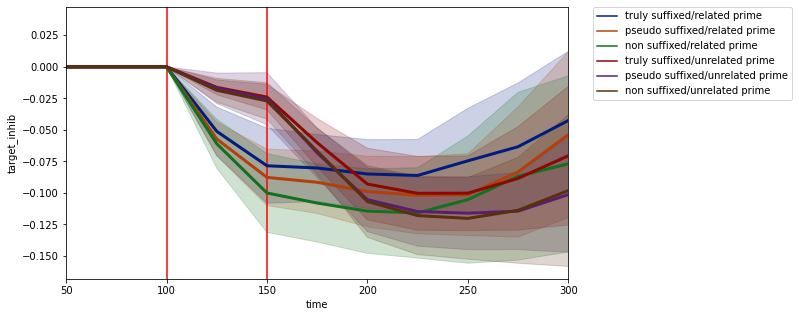

In [255]:
# initializing list of lists 
test_list = list(range(max_cycles))
# declaring magnitude of repetition 
K = len(df)

m = K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25

f, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=50, right=300)

ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

hue_order = ['truly suffixed/related prime', 'pseudo suffixed/related prime', 'non suffixed/related prime',
            'truly suffixed/unrelated prime', 'pseudo suffixed/unrelated prime', 'non suffixed/unrelated prime']

sns.lineplot(ax=ax, data=target2plot, x="time", y="target_inhib", hue = "condition",palette='dark' , ci='sd',  linewidth=3, 
            hue_order = hue_order)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [256]:
target2plot

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
0,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 8.38058037861252, 12...","[0, 0, 0, 0, 0, 0.22311781163841243, 0.3617167...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1431091...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,0,0
1,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 8.38058037861252, 12...","[0, 0, 0, 0, 0, 0.22311781163841243, 0.3617167...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1431091...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,1,25
2,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 8.38058037861252, 12...","[0, 0, 0, 0, 0, 0.22311781163841243, 0.3617167...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1431091...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,2,50
3,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 8.38058037861252, 12...","[0, 0, 0, 0, 0, 0.22311781163841243, 0.3617167...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1431091...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,3,75
4,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 8.38058037861252, 12...","[0, 0, 0, 0, 0, 0.22311781163841243, 0.3617167...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1431091...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,4,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,132,21,525
3428,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,132,22,550
3429,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,132,23,575
3430,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.447343616845869, 1...","[0, 0, 0, 0, 0, 0.23420253069660796, 0.3820602...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,132,24,600


In [257]:
# zoom in op tijdstip 2 

target2plot_inhibcycle = target2plot[target2plot['cycle nr'] == 6]

In [258]:
target2plot_inhibcycle

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
6,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 8.38058037861252, 12...","[0, 0, 0, 0, 0, 0.22311781163841243, 0.3617167...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1431091...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.090512,0.0,1,6,150
32,1,tight,tighten,tight,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[0.0, 0.0, 0.0, 0.0, 0.0, 6.654187443187413, 9...","[0, 0, 0, 0, 0, 0.17862162658648978, 0.2921293...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1332287...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.086768,0.0,2,6,150
58,2,box,boxer,box,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.0, 0.0, 0.0, 0.0, 5.783916970456005, 8...","[0, 0, 0, 0, 0, 0.23722798784876128, 0.3857249...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1668796...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.062151,0.0,3,6,150
84,3,own,owner,own,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 5.989492344428769, 8...","[0, 0, 0, 0, 0, 0.19041666030907647, 0.2974538...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1291673...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.097812,0.0,4,6,150
110,4,farm,farmer,farm,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 7.306802929998752, 1...","[0, 0, 0, 0, 0, 0.2256978468053948, 0.36975037...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1545201...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.073783,0.0,5,6,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,127,too,beefy,too,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 5.655683485102206, 7...","[0, 0, 0, 0, 0, 0.32261768323386136, 0.5226624...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.009023,0.0,128,6,150
3334,128,beg,griped,beg,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.862759148951746, 8...","[0, 0, 0, 0, 0, 0.2368142687986024, 0.39157136...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.024456,0.0,129,6,150
3360,129,ski,dusty,ski,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[0.0, 0.0, 0.0, 0.0, 0.0, 5.3911842048887095, ...","[0, 0, 0, 0, 0, 0.26258234790065393, 0.4350113...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.019827,0.0,130,6,150
3386,130,won,gloomy,won,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.331489977232776, 7...","[0, 0, 0, 0, 0, 0.31590714388892993, 0.5149168...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.035583,0.0,131,6,150


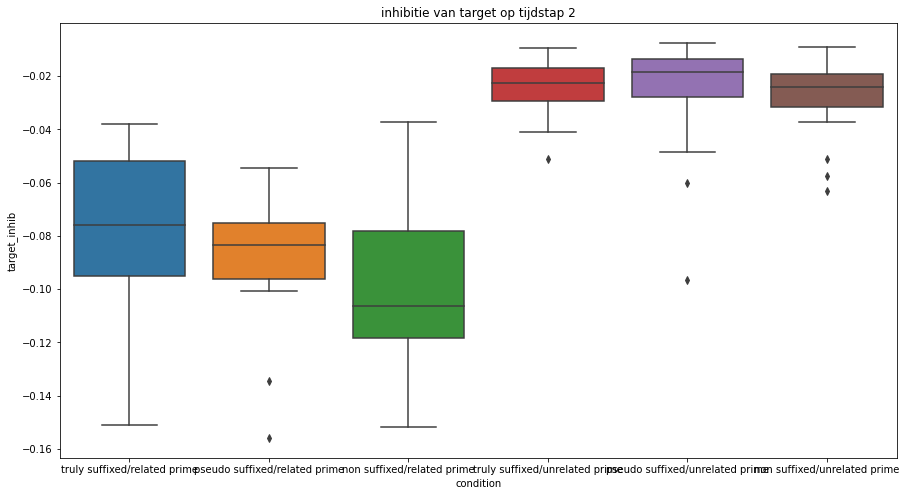

In [259]:
f, ax = plt.subplots(figsize=(15,8))

order = ['truly suffixed/related prime', 'pseudo suffixed/related prime', 'non suffixed/related prime',
            'truly suffixed/unrelated prime', 'pseudo suffixed/unrelated prime', 'non suffixed/unrelated prime']

sns.boxplot(ax = ax, x = 'condition', y = 'target_inhib', data = target2plot_inhibcycle, order = order)
plt.title('inhibitie van target op tijdstap 2')
plt.show()

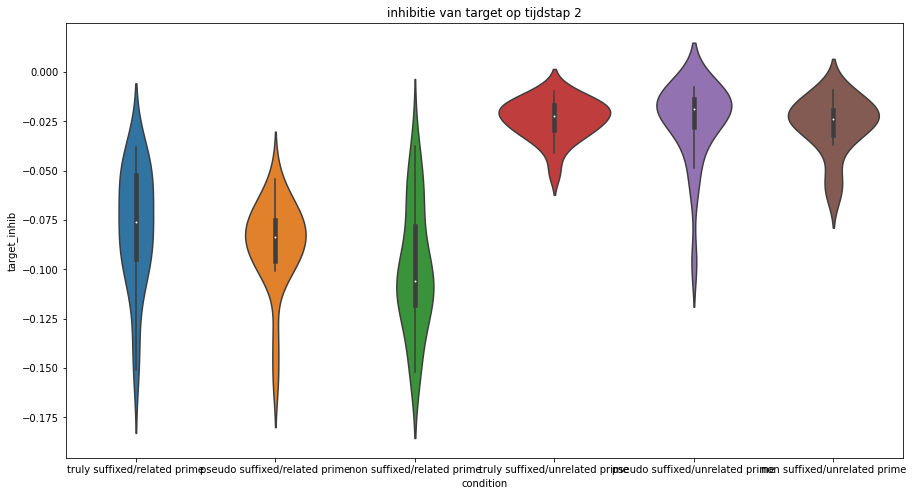

In [260]:
f, ax = plt.subplots(figsize=(15,8))

fix = pd.DataFrame(target2plot_inhibcycle.to_dict())

sns.violinplot(ax = ax, x = 'condition', y = 'target_inhib', data = fix, order = order)
plt.title('inhibitie van target op tijdstap 2')
plt.show()

In [189]:
sns.boxplot(y = 'reaction time', data = target2plot[target2plot['condition'] == 'non suffixed/related prime'])
        

TypeError: Vertical orientation requires numeric `y` variable.

In [184]:
target2plot[target2plot['condition'] == 'non suffixed/related prime']

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
11176,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.0, 0.0, 0.0, 0.0, 16.76584707511467, 1...","[0, 0, 0, 0, 0, 0.41009537035116145, 0.4868347...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2759953...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.0,89,0,0
11177,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.0, 0.0, 0.0, 0.0, 16.76584707511467, 1...","[0, 0, 0, 0, 0, 0.41009537035116145, 0.4868347...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2759953...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.0,89,1,25
11178,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.0, 0.0, 0.0, 0.0, 16.76584707511467, 1...","[0, 0, 0, 0, 0, 0.41009537035116145, 0.4868347...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2759953...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.0,89,2,50
11179,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.0, 0.0, 0.0, 0.0, 16.76584707511467, 1...","[0, 0, 0, 0, 0, 0.41009537035116145, 0.4868347...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2759953...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.0,89,3,75
11180,88,cash,cashew,cash,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.0, 0.0, 0.0, 0.0, 16.76584707511467, 1...","[0, 0, 0, 0, 0, 0.41009537035116145, 0.4868347...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2759953...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.0,89,4,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13965,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 0.0, 0.0, 0.0, 0.0, 19.327085129120157, ...","[0, 0, 0, 0, 0, 0.34463525020734487, 0.3701516...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2767969...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.01834862385321101,110,122,3050
13966,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 0.0, 0.0, 0.0, 0.0, 19.327085129120157, ...","[0, 0, 0, 0, 0, 0.34463525020734487, 0.3701516...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2767969...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.01834862385321101,110,123,3075
13967,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 0.0, 0.0, 0.0, 0.0, 19.327085129120157, ...","[0, 0, 0, 0, 0, 0.34463525020734487, 0.3701516...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2767969...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.01834862385321101,110,124,3100
13968,109,cart,carton,cart,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 0.0, 0.0, 0.0, 0.0, 19.327085129120157, ...","[0, 0, 0, 0, 0, 0.34463525020734487, 0.3701516...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2767969...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-2,0.15,0.0,0.01834862385321101,110,125,3125


In [267]:
target2plot_inhibcycle[target2plot_inhibcycle['target_inhib'] == target2plot_inhibcycle[target2plot_inhibcycle['condition'] == 'non suffixed/related prime']['target_inhib'].max()]
## min inhibition


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
2606,100,drag,dragon,drag,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.0, 0.0, 0.0, 0.0, 5.97080663375896, 8....","[0, 0, 0, 0, 0, 0.24726421184306033, 0.4145969...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.1862530...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.037306,0.0,101,6,150


In [268]:
target2plot_inhibcycle[target2plot_inhibcycle['target_inhib'] == target2plot_inhibcycle[target2plot_inhibcycle['condition'] == 'non suffixed/related prime']['target_inhib'].min()]
## max inhibition

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
2554,98,tea,tease,tea,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.326254391905007, ...","[0, 0, 0, 0, 0, 0.2111030375126862, 0.32724265...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0979180...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.151806,0.0,99,6,150
